In [1]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from configuration import ROOT_DIR

In [2]:
inference_path = ROOT_DIR/"__inference_comparison"
inference_path_str = str(inference_path)

In [ ]:
# Generate a few images
!python infer.py -e 1004 2003 2005  -o $inference_path_str -t target degraded restored --size "512,512 256,256 128,128" --std-dev "40,40" -n 1


In [ ]:
!python infer.py -e 1004 2003 2005 -o $inference_path_str -t metrics --size "512,512 256,256 128,128" --std-dev "1,1 5,5 10,10 20,20 30,30 40,40 50,50 80,80" -n 5
# Note ! we could call python directly instead of using command line

In [6]:
def plot_results(selected_paths, title=None):
    plt.figure(figsize=(10, 10))
    for selected_path, selected_regex in selected_paths:
        selected_path = Path(selected_path)
        assert selected_path.exists()
        results_path = sorted(list(selected_path.glob(selected_regex)))
        stats = []
        for result_path in results_path:
            df = pd.read_csv(result_path)
            # print(df.head())
            in_psnr = df["in_PSNR"].mean()
            out_psnr = df["out_PSNR"].mean()
            stats.append({
                "in_psnr": in_psnr,
                "out_psnr": out_psnr,
            })
            label = selected_path.name + " " + df["size"][0]
        stats_array = pd.DataFrame(stats)
        # print(stats_array)
        # plt.plot(stats_array["in_psnr"], stats_array["out_psnr"], label=selected_path.name)
        plt.plot(
            stats_array["in_psnr"],
            stats_array["out_psnr"]-stats_array["in_psnr"],
            "-o",
            label=label
        )
            # label=selected_path.name)
        plt.xlabel("PSNR in")
        plt.ylabel("PSNR improvement")
        plt.ylim(0, 15)
    if title is not None:
        plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

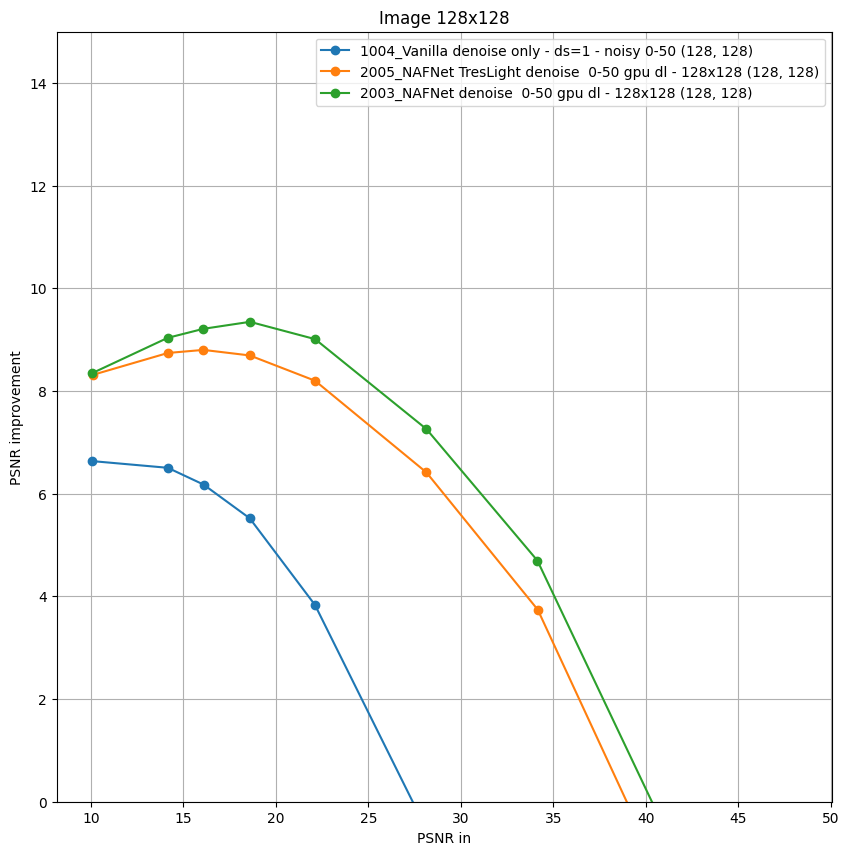

In [11]:
selected_paths = [
    (inference_path/"1004_Vanilla denoise only - ds=1 - noisy 0-50", "*0128*.csv"), 
    (inference_path/"2005_NAFNet TresLight denoise  0-50 gpu dl - 128x128", "*0128*.csv"),
    (inference_path/"2003_NAFNet denoise  0-50 gpu dl - 128x128", "*0128*.csv"),
]
plot_results(selected_paths, title="Image 128x128")


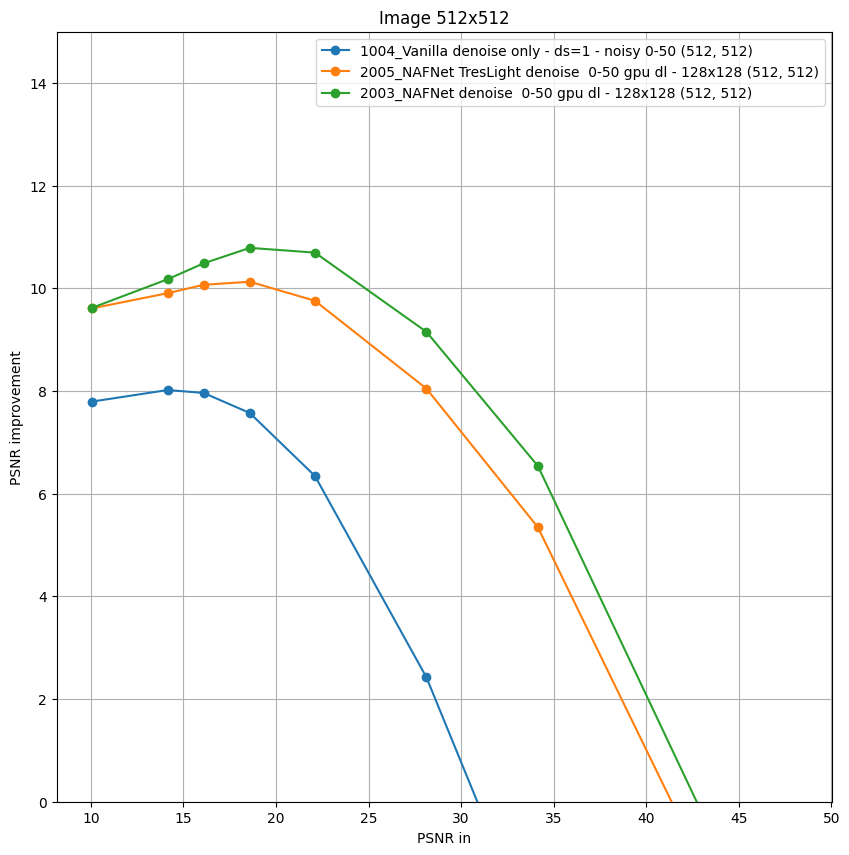

In [12]:
selected_paths = [
    (inference_path/"1004_Vanilla denoise only - ds=1 - noisy 0-50", "*0512*.csv"),
    (inference_path/"2005_NAFNet TresLight denoise  0-50 gpu dl - 128x128","*0512*.csv"),
    (inference_path/"2003_NAFNet denoise  0-50 gpu dl - 128x128","*0512*.csv"),
]
plot_results(selected_paths, title="Image 512x512")


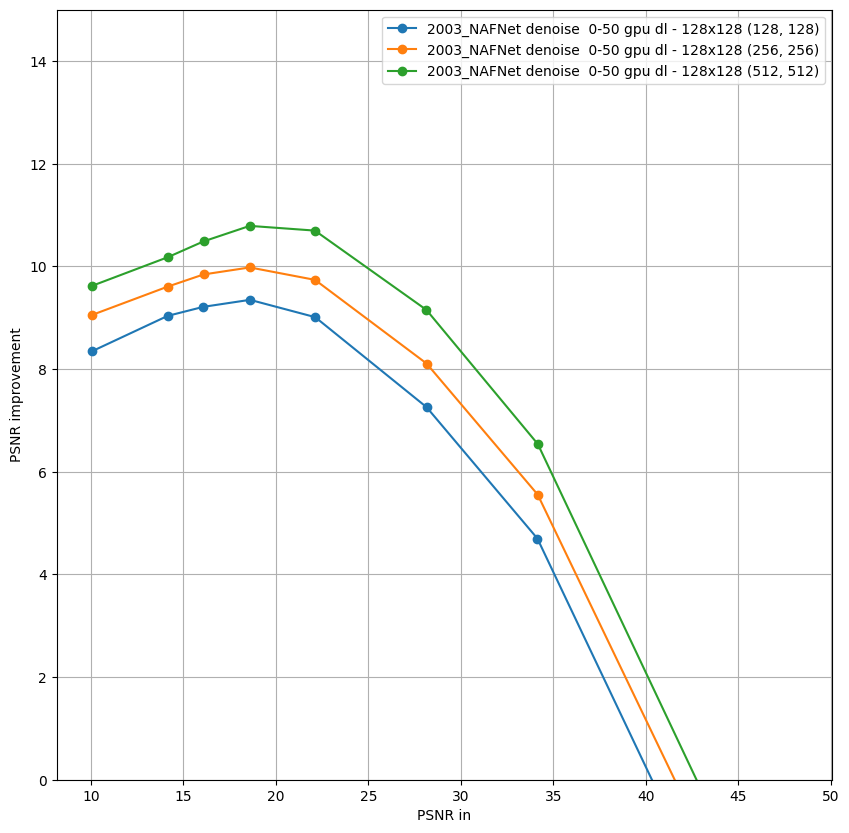

In [9]:
selected_paths = [

    (inference_path/"2003_NAFNet denoise  0-50 gpu dl - 128x128", "*0128*.csv"),
    (inference_path/"2003_NAFNet denoise  0-50 gpu dl - 128x128","*0256*.csv"),
    (inference_path/"2003_NAFNet denoise  0-50 gpu dl - 128x128","*0512*.csv"),
]
plot_results(selected_paths)

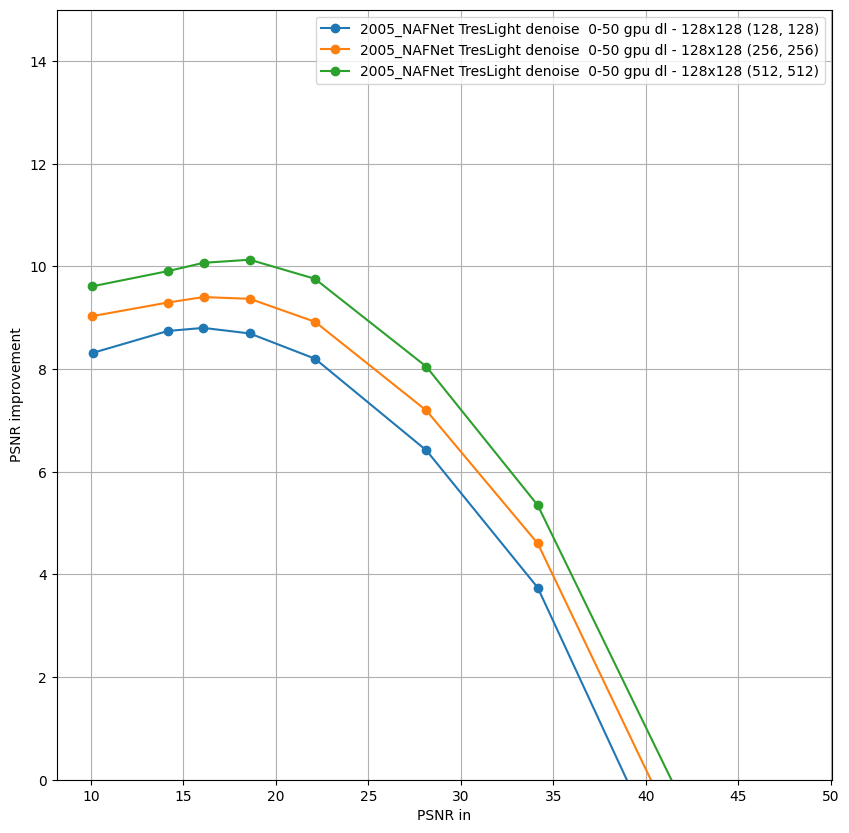

In [13]:
selected_paths = [
    (inference_path / "2005_NAFNet TresLight denoise  0-50 gpu dl - 128x128", "*0128*.csv"),
    (inference_path / "2005_NAFNet TresLight denoise  0-50 gpu dl - 128x128", "*0256*.csv"),
    (inference_path / "2005_NAFNet TresLight denoise  0-50 gpu dl - 128x128", "*0512*.csv"),
]
plot_results(selected_paths)